In [595]:
# import required data analysis libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Q1) Data Importation and preparation

In [780]:
df = pd.read_csv('447_project_data_fixed.csv')

In [781]:
df.shape

(949, 22)

In [783]:
df.isna().sum()

Date                                  0
Euro 10 Year Bond Yield               0
Euro 1 Year Bond Yield                0
Euro 6 Month Yield                    0
Euro 3 Month Yield                    0
US 10 year Bonds                      0
US 3 month                            0
US 5 year                             0
US Bond Index (LBUSTRUU)              0
Effective Fed Funds US                0
Global High Yield Index (LG30TRUU)    0
MSCI Emerging Markets                 0
CAC 40                                0
SP500                                 0
Global Volatility Index               0
US Dollar Index                       0
Commodities Index                     0
CITI Economic Surprise Index US       0
CITI Economic Surprise Index EU       0
US 6 month                            0
Close                                 0
target                                0
dtype: int64

In [784]:
df['target']

0      0.008595
1      0.003785
2      0.011994
3      0.021776
4     -0.036501
         ...   
944   -0.012592
945   -0.014846
946    0.025572
947   -0.001771
948   -0.004306
Name: target, Length: 949, dtype: float64

In [785]:
df.rename(columns={"target": "log_ret"}, inplace = True)

In [786]:
df.head(3)

,Date,Euro 10 Year Bond Yield,Euro 1 Year Bond Yield,Euro 6 Month Yield,Euro 3 Month Yield,US 10 year Bonds,US 3 month,US 5 year,US Bond Index (LBUSTRUU),Effective Fed Funds US,...,CAC 40,SP500,Global Volatility Index,US Dollar Index,Commodities Index,CITI Economic Surprise Index US,CITI Economic Surprise Index EU,US 6 month,Close,log_ret
0,2003-12-12,4.304,2.235,2.143,2.177,4.2379,0.8864,3.2182,1155.16,0.98,...,3470.60,1074.14,9.80,88.60,136.6262,54.9,75.9,0.9807,1.238497,0.008595
1,2003-12-19,4.289,2.234,2.119,2.162,4.1332,0.8659,3.1530,1161.23,1.00,...,3502.04,1088.67,9.82,88.15,136.7654,79.5,80.1,0.9499,1.243194,0.003785
2,2003-12-26,4.250,2.231,2.135,2.261,4.1503,0.8557,3.1485,1161.55,0.99,...,3510.30,1095.89,9.81,87.63,134.6716,76.3,60.4,0.9806,1.258194,0.011994


In [787]:
df.rename(columns={"Close": "price"}, inplace = True)

In [788]:
df.columns

Index(['Date', 'Euro 10 Year Bond Yield', 'Euro 1 Year Bond Yield',
       'Euro 6 Month Yield', 'Euro 3 Month Yield', 'US 10 year Bonds',
       'US 3 month', 'US 5 year ', 'US Bond Index (LBUSTRUU)',
       'Effective Fed Funds US', 'Global High Yield Index (LG30TRUU)',
       'MSCI Emerging Markets', 'CAC 40', 'SP500', 'Global Volatility Index',
       'US Dollar Index', 'Commodities Index',
       'CITI Economic Surprise Index US', 'CITI Economic Surprise Index EU',
       'US 6 month', 'price', 'log_ret'],
      dtype='object')

In [789]:
# fix index with Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df.set_index('Date', inplace = True)

In [790]:
df.head(2)

,Euro 10 Year Bond Yield,Euro 1 Year Bond Yield,Euro 6 Month Yield,Euro 3 Month Yield,US 10 year Bonds,US 3 month,US 5 year,US Bond Index (LBUSTRUU),Effective Fed Funds US,Global High Yield Index (LG30TRUU),...,CAC 40,SP500,Global Volatility Index,US Dollar Index,Commodities Index,CITI Economic Surprise Index US,CITI Economic Surprise Index EU,US 6 month,price,log_ret
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-12,4.304,2.235,2.143,2.177,4.2379,0.8864,3.2182,1155.16,0.98,432.6356,...,3470.60,1074.14,9.80,88.60,136.6262,54.9,75.9,0.9807,1.238497,0.008595
2003-12-19,4.289,2.234,2.119,2.162,4.1332,0.8659,3.1530,1161.23,1.00,435.8979,...,3502.04,1088.67,9.82,88.15,136.7654,79.5,80.1,0.9499,1.243194,0.003785


### Step 1) Building Benchmark Model

before exploring machine learning model, for benchmark analysis, we would like to test models for simple trading strategies such as momentum and simple moving average

#### Implementing Momentum Strategy

In [791]:
momentum = df[['price', 'log_ret']]

In [792]:
momentum.head(3)

,price,log_ret
Date,,
2003-12-12,1.238497,0.008595
2003-12-19,1.243194,0.003785
2003-12-26,1.258194,0.011994


In [793]:
to_plot = []

In [794]:
for m in [1,3,5,7,9, 10, 14]:
    momentum['position_%d' % m] = np.sign(momentum['log_ret'].rolling(m).mean())
    momentum['strategy_%d' % m] = (momentum['position_%d' % m].shift(1)*momentum['log_ret'])
    to_plot.append('strategy_%d' % m)

C:\Users\r-iup\AppData\Local\Temp/ipykernel_10096/3044182105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  momentum['position_%d' % m] = np.sign(momentum['log_ret'].rolling(m).mean())
C:\Users\r-iup\AppData\Local\Temp/ipykernel_10096/3044182105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  momentum['strategy_%d' % m] = (momentum['position_%d' % m].shift(1)*momentum['log_ret'])


<AxesSubplot:title={'center':'Different momentum parameters'}, xlabel='Date'>

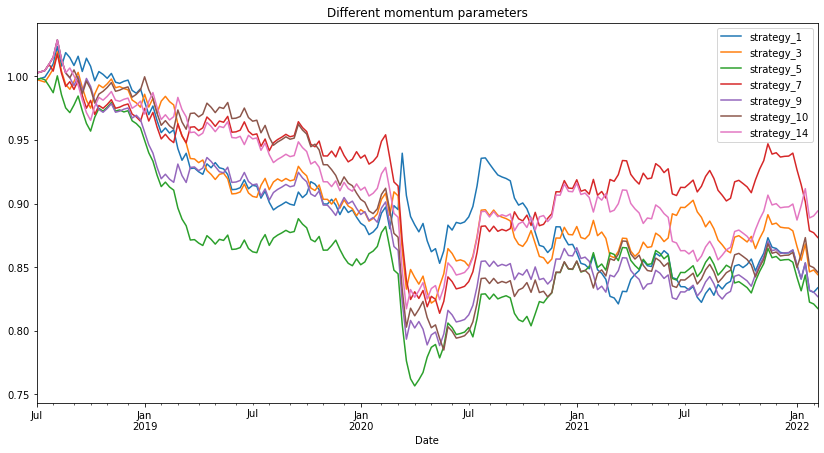

In [795]:
momentum[to_plot].loc['2018-07-01':,:].cumsum().apply(np.exp).plot(title = 'Different momentum parameters', figsize = (14,7))

As we see from the figure momentum strategy does not really work with exchange rate, we will not be able to use it as benchmark for our model

#### Implementing Simple Moving Average 

In [796]:
df_SMA = df[['price', 'log_ret']].copy()

In [797]:
# Calculate the simple moving average

SMA1 = 15
SMA2 = 45

df_SMA['SMA1'] = df_SMA['price'].rolling(SMA1).mean()
df_SMA['SMA2'] = df_SMA['price'].rolling(SMA2).mean()

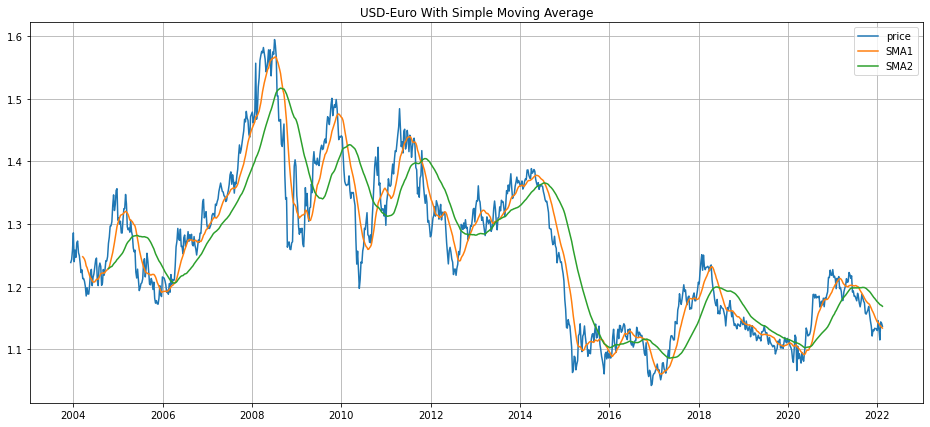

In [798]:
# plot the filter
%matplotlib inline
plt.figure(figsize = (16, 7))
plt.title("USD-Euro With Simple Moving Average")
plt.plot(df_SMA[['price', 'SMA1', 'SMA2']])
plt.legend(['price', 'SMA1', 'SMA2'])
plt.grid()

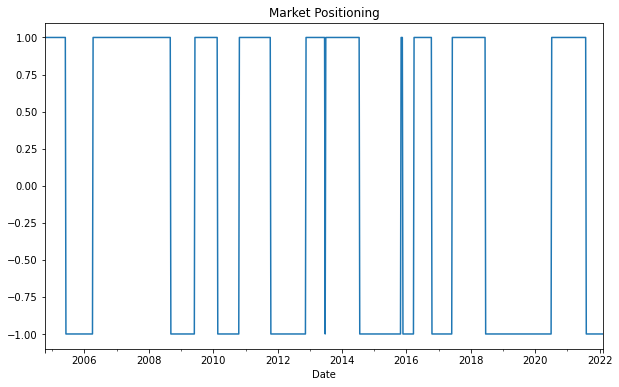

In [799]:
# Signal Creation

df_SMA['signal'] = np.where(df_SMA['SMA1']> df_SMA['SMA2'], 1, -1)

# drop missing values
df_SMA.dropna(inplace = True)

# plot the position overtime
df_SMA['signal'].plot(ylim=[-1.1,1.1], title = 'Market Positioning', figsize=(10,6));

In [800]:
# calculating SMA returns

df_SMA['strategy return'] = df_SMA['signal'].shift(1)*df_SMA['log_ret']

In [1232]:
df_SMA.head()

,price,log_ret,SMA1,SMA2,signal,strategy return
Date,,,,,,
2004-10-15,1.269100,0.016850,1.229165,1.228802,1,NaN
2004-10-22,1.279198,0.007925,1.231405,1.229707,1,0.007925
2004-10-29,1.296697,0.013587,1.237212,1.230896,1,0.013587
2004-11-05,1.297000,0.000233,1.243571,1.231758,1,0.000233
2004-11-12,1.303900,0.005306,1.248445,1.232158,1,0.005306


<AxesSubplot:title={'center':'Simple Moving Average [SMA1=15, SMA2= 45 days]'}, xlabel='Date'>

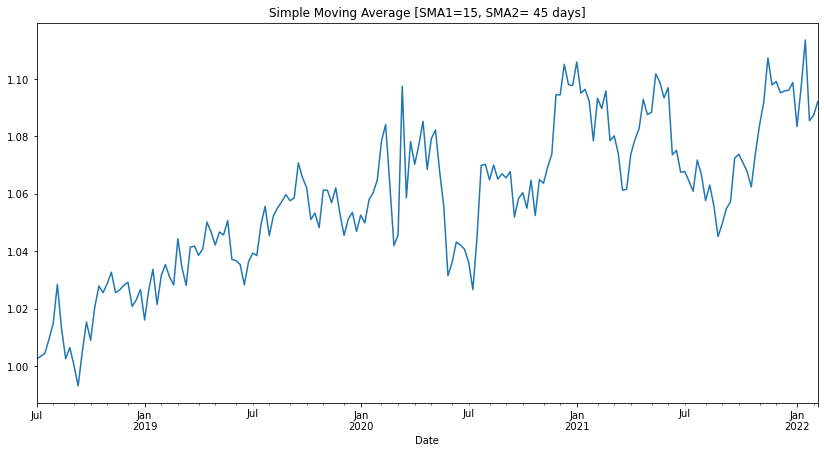

In [802]:
df_SMA.loc['2018-07-01':,'strategy return'].cumsum().apply(np.exp).plot(title = 'Simple Moving Average [SMA1=15, SMA2= 45 days]', figsize = (14,7))

In [1242]:
# Cumulative return for moving average
np.exp(df_SMA.loc['2018-07-01':,'strategy return'].sum())

1.0920906400131436

In [1230]:
T = len(df.loc['2018-07-01':,'log_ret'])/52

In [1234]:
# Annualized return for moving average

np.power(np.exp(df_SMA.loc['2018-07-01':,'strategy return'].sum()),1/T)

1.0245335839264038

In [1243]:
df_SMA_test = df_SMA.loc['2018-07-01':,'strategy return']

In [1246]:
df1 = pd.DataFrame(df_SMA_test)

In [1247]:
# defines a new column, cumret, with the gross performance over time
df1['cumret'] = df1['strategy return'].cumsum().apply(np.exp)

In [1248]:
# defines yet another column with the running maximum value of the gross performance
df1['cummax'] = df1['cumret'].cummax()

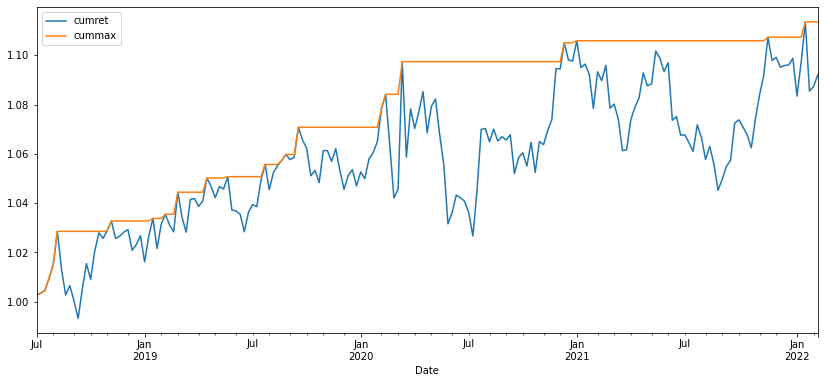

In [1249]:
# plots 
df1[['cumret', 'cummax']].dropna().plot(figsize=(14,6));

In [1250]:
# calculate maximum drawdown

drawdown = df1['cummax']-df1['cumret']

drawdown.max()

0.07078361138432343

In [1251]:
### arthimatice monthly average return
SMA_M = df1.resample('M').sum()

In [1253]:
# Monthly Returns

SMA_M['monthly ret%'] = (SMA_M['strategy return'].apply(np.exp)-1)*100

In [1254]:
SMA_M['monthly ret%'].mean()

0.21138652966132696

In [1255]:
# sharp ratio for monthly returns
sharpe_ratio(SMA_M['monthly ret%'], 1.5/12)

0.05760346857332154

The cumulative return for simple moving average strategy is 9.2% with annualized return of 2.4%, this will be used to benchmark our model performance along with HFRI currency index

## Q2 and Q3 Fit Machine Learning Model (DNN) and Tune it 

### A) Test Simple Model using lagged returns only

In [1156]:
data_1 = df[['price', 'log_ret']]

In [1157]:
data_1.head(3)

,price,log_ret
Date,,
2003-12-12,1.238497,0.008595
2003-12-19,1.243194,0.003785
2003-12-26,1.258194,0.011994


#### step1: Create Binary Direction for price movement

In [1158]:
# let's create direction 
data_1['direction'] = np.where(data_1['log_ret']>0, 1,0)

C:\Users\r-iup\AppData\Local\Temp/ipykernel_10096/622356561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['direction'] = np.where(data_1['log_ret']>0, 1,0)


#### step2: Create the required number of return lags

In [1159]:
# create 3 lags
lags = 3

cols = []
for lag in range(1, lags+1):
    col = f'lag_{lag}'
    data_1[col] = data_1['log_ret'].shift(lag)
    cols.append(col)
data_1.dropna(inplace = True)

C:\Users\r-iup\AppData\Local\Temp/ipykernel_10096/2331241899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[col] = data_1['log_ret'].shift(lag)
C:\Users\r-iup\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [1160]:
data_1.round(4).tail()

,price,log_ret,direction,lag_1,lag_2,lag_3
Date,,,,,,
2022-01-14,1.1314,-0.0126,0,0.0141,-0.0025,-0.0002
2022-01-21,1.1147,-0.0148,0,-0.0126,0.0141,-0.0025
2022-01-28,1.1436,0.0256,1,-0.0148,-0.0126,0.0141
2022-02-04,1.1416,-0.0018,0,0.0256,-0.0148,-0.0126
2022-02-11,1.1366,-0.0043,0,-0.0018,0.0256,-0.0148


#### step3: Import DNN Model & Build the training data 

In [1161]:
# now fiting dense neural network (DNN)

import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

In [1162]:
optimizer = Adam(learning_rate = 0.00001)

In [1163]:
import random 

def set_seeds(seed=101):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [1164]:
set_seeds()

# model specifications

model = Sequential()
model.add(Dense(62, activation = 'relu', input_shape = (lags,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1165]:
# splitting the training data for cross-validation (80-20% split)

cutoff = '2018-07-01'

training_data = data_1[data_1.index < cutoff].copy()

# Normalizes the data by Gaussian normalization
mu, std = training_data.mean(), training_data.std()
training_data_ = (training_data - mu)/std

test_data = data_1[data_1.index >= cutoff].copy()
test_data_ = (test_data - mu)/ std

In [1166]:
training_data

,price,log_ret,direction,lag_1,lag_2,lag_3
Date,,,,,,
2004-01-02,1.285892,0.021776,1,0.011994,0.003785,0.008595
2004-01-09,1.239803,-0.036501,0,0.021776,0.011994,0.003785
2004-01-16,1.258305,0.014813,1,-0.036501,0.021776,0.011994
2004-01-23,1.246805,-0.009181,0,0.014813,-0.036501,0.021776
2004-01-30,1.270002,0.018435,1,-0.009181,0.014813,-0.036501
...,...,...,...,...,...,...
2018-06-01,1.179523,0.008691,1,-0.002517,-0.006173,-0.010315
2018-06-08,1.156658,-0.019576,0,0.008691,-0.002517,-0.006173
2018-06-15,1.160578,0.003383,1,-0.019576,0.008691,-0.002517


##### Now we fit the model to the training data


In [1167]:
%%time
model.fit(training_data_[cols], training_data['direction'], epochs = 50, verbose = False, validation_split=0.2, shuffle=False)

Wall time: 1.61 s


In [1168]:
res = pd.DataFrame(model.history.history)

<AxesSubplot:>

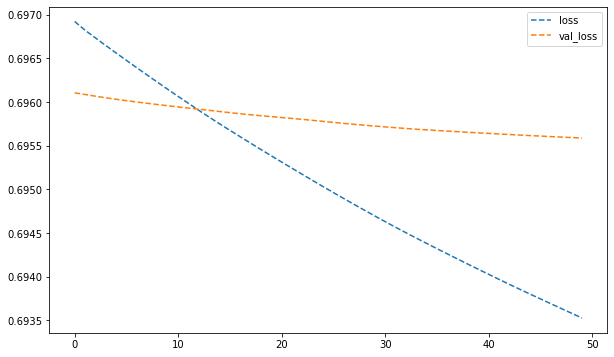

In [1169]:
res[['loss', 'val_loss']].plot(figsize=(10,6), style = '--')

In [1170]:
# check the accuracy for in-sample prediction
model.evaluate(training_data_[cols], training_data['direction'])

24/24 [==============================] - 0s 607us/step - loss: 0.6939 - accuracy: 0.5258


[0.6939159631729126, 0.5257595777511597]

##### Evaluate the Strategy Return (in-sample)

In [1171]:
# convert predicted probablities to direction
pred = np.where(model.predict(training_data_[cols])>0.5, 1, 0)

In [1172]:
# check prediction results
pred[:30].flatten()

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1])

In [1173]:
# convert direction to strategy positions
training_data['positions'] = np.where(pred>0, 1, -1) 

In [1174]:
training_data.head()

,price,log_ret,direction,lag_1,lag_2,lag_3,positions
Date,,,,,,,
2004-01-02,1.285892,0.021776,1,0.011994,0.003785,0.008595,1
2004-01-09,1.239803,-0.036501,0,0.021776,0.011994,0.003785,1
2004-01-16,1.258305,0.014813,1,-0.036501,0.021776,0.011994,1
2004-01-23,1.246805,-0.009181,0,0.014813,-0.036501,0.021776,1
2004-01-30,1.270002,0.018435,1,-0.009181,0.014813,-0.036501,1


In [1175]:
# find the strategy return and compare it to just holding the asset
training_data['strategy'] = (training_data['positions']*training_data['log_ret'])

In [1176]:
training_data[['log_ret', 'strategy']].sum().apply(np.exp)

log_ret     0.929579
strategy    1.045507
dtype: float64

<AxesSubplot:xlabel='Date'>

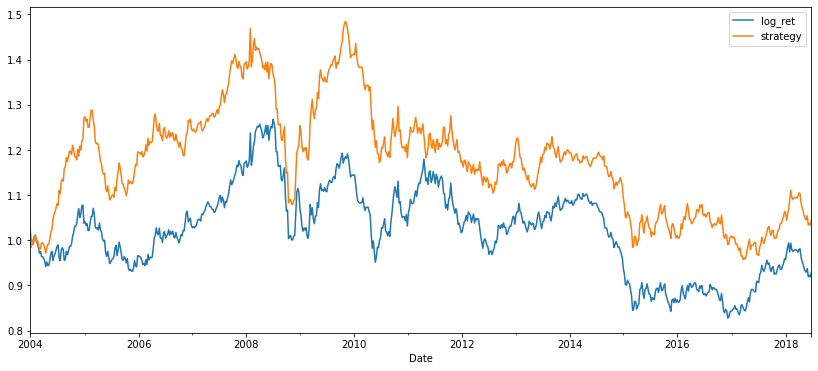

In [1177]:
training_data[['log_ret','strategy']].cumsum().apply(np.exp).plot(figsize=(14,6))

##### Evaluate the Strategy Return (out-of-sample)

In [1178]:
# check the accuracy for out-of-sample prediction
model.evaluate(test_data_[cols], test_data['direction'])

6/6 [==============================] - 0s 798us/step - loss: 0.6937 - accuracy: 0.4709


[0.6937128901481628, 0.47089946269989014]

In [1179]:
pred = np.where(model.predict(test_data_[cols])>0.5, 1, 0)

In [1180]:
test_data['positions'] = np.where(pred>0,1,-1)

In [1181]:
# find the strategy return and compare it to just holding the asset
test_data['strategy'] = (test_data['positions']*test_data['log_ret'])

In [1182]:
test_data[['log_ret', 'strategy']].sum().apply(np.exp)

log_ret     0.971834
strategy    1.053920
dtype: float64

<AxesSubplot:xlabel='Date'>

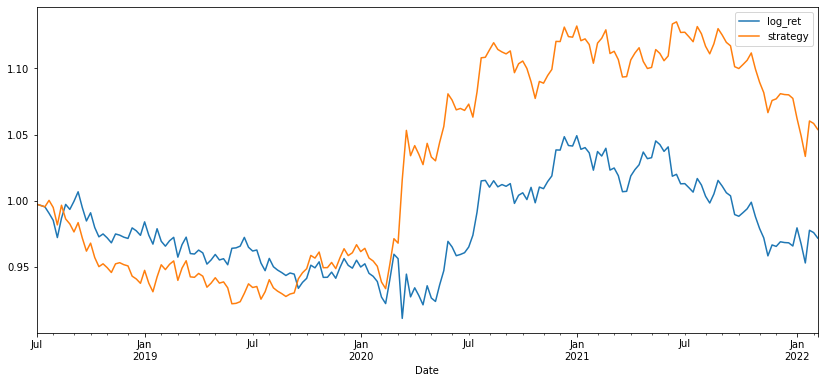

In [1183]:
test_data[['log_ret','strategy']].cumsum().apply(np.exp).plot(figsize=(14,6))

In [969]:
Model_1 = data_1.join(test_data['strategy'])

In [970]:
Model_1

,price,log_ret,direction,lag_1,lag_2,lag_3,strategy
Date,,,,,,,
2004-01-02,1.285892,0.021776,1,0.011994,0.003785,0.008595,NaN
2004-01-09,1.239803,-0.036501,0,0.021776,0.011994,0.003785,NaN
2004-01-16,1.258305,0.014813,1,-0.036501,0.021776,0.011994,NaN
2004-01-23,1.246805,-0.009181,0,0.014813,-0.036501,0.021776,NaN
2004-01-30,1.270002,0.018435,1,-0.009181,0.014813,-0.036501,NaN
...,...,...,...,...,...,...,...
2022-01-14,1.131375,-0.012592,0,0.014084,-0.002488,-0.000204,-0.012592
2022-01-21,1.114703,-0.014846,0,-0.012592,0.014084,-0.002488,-0.014846
2022-01-28,1.143576,0.025572,1,-0.014846,-0.012592,0.014084,0.025572


### B) Adding Economic Indicators & Momentum to the Model

In [1049]:
data_2 = data_1.copy()

In [1050]:
data_2.head()

,price,log_ret,direction,lag_1,lag_2,lag_3
Date,,,,,,
2004-01-02,1.285892,0.021776,1,0.011994,0.003785,0.008595
2004-01-09,1.239803,-0.036501,0,0.021776,0.011994,0.003785
2004-01-16,1.258305,0.014813,1,-0.036501,0.021776,0.011994
2004-01-23,1.246805,-0.009181,0,0.014813,-0.036501,0.021776
2004-01-30,1.270002,0.018435,1,-0.009181,0.014813,-0.036501


In [1051]:
# now we will add, three months interet rate differential, CAC, and SP500

# first calculate the three months interest rate diff

df['interest_diff'] = df['US 3 month']-df['Euro 3 Month Yield']

In [1052]:
df.loc['2004-01-02':,'interest_diff']

Date
2004-01-02   -1.2684
2004-01-09   -1.2873
2004-01-16   -1.2439
2004-01-23   -1.2398
2004-01-30   -1.2222
               ...  
2022-01-14    0.7476
2022-01-21    0.8327
2022-01-28    0.8460
2022-02-04    0.8902
2022-02-11    1.0149
Name: interest_diff, Length: 946, dtype: float64

In [1053]:
data_2['3M_interest_diff'] = df.loc['2004-01-02':,'interest_diff'].copy()

In [1054]:
data_2

,price,log_ret,direction,lag_1,lag_2,lag_3,3M_interest_diff
Date,,,,,,,
2004-01-02,1.285892,0.021776,1,0.011994,0.003785,0.008595,-1.2684
2004-01-09,1.239803,-0.036501,0,0.021776,0.011994,0.003785,-1.2873
2004-01-16,1.258305,0.014813,1,-0.036501,0.021776,0.011994,-1.2439
2004-01-23,1.246805,-0.009181,0,0.014813,-0.036501,0.021776,-1.2398
2004-01-30,1.270002,0.018435,1,-0.009181,0.014813,-0.036501,-1.2222
...,...,...,...,...,...,...,...
2022-01-14,1.131375,-0.012592,0,0.014084,-0.002488,-0.000204,0.7476
2022-01-21,1.114703,-0.014846,0,-0.012592,0.014084,-0.002488,0.8327
2022-01-28,1.143576,0.025572,1,-0.014846,-0.012592,0.014084,0.8460


In [1055]:
data_2['SP500-CAC 40'] = df.loc['2004-01-02':,'CAC 40'] - df.loc['2004-01-02':,'SP500'].copy()

In [1057]:
data_2['momentum'] = df['log_ret'].rolling(5).mean().shift(1)

In [1066]:
data_2 = data_2.dropna()

In [1067]:
data_2.head()

,price,log_ret,direction,lag_1,lag_2,lag_3,3M_interest_diff,SP500-CAC 40,momentum
Date,,,,,,,,,
2004-01-16,1.258305,0.014813,1,-0.036501,0.021776,0.011994,-1.2439,2531.97,0.001930
2004-01-23,1.246805,-0.009181,0,0.014813,-0.036501,0.021776,-1.2398,2551.81,0.003173
2004-01-30,1.270002,0.018435,1,-0.009181,0.014813,-0.036501,-1.2222,2507.31,0.000580
2004-02-06,1.272799,0.002200,1,0.018435,-0.009181,0.014813,-1.1930,2481.96,0.001868
2004-02-13,1.254202,-0.014719,0,0.002200,0.018435,-0.009181,-1.1942,2503.53,-0.002047


In [1071]:
cols.extend(['3M_interest_diff', 'SP500-CAC 40', 'momentum'])

In [1086]:
cols

['lag_1', 'lag_2', 'lag_3', '3M_interest_diff', 'SP500-CAC 40', 'momentum']

##### Fiting DNN Model

In [1073]:
# splitting the training data (80-20% split)

cutoff = '2018-07-01'

training_data = data_2[data_2.index < cutoff].copy()

# Normalizes the data by Gaussian normalization
mu, std = training_data.mean(), training_data.std()
training_data_ = (training_data - mu)/std

test_data = data_2[data_2.index >= cutoff].copy()
test_data_ = (test_data - mu)/ std

In [1081]:
set_seeds()

# model specifications

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (len(cols),)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

##### Now we fit the model to the training data

In [1087]:
%%time
model.fit(training_data_[cols], training_data['direction'], epochs = 50, verbose = False, validation_split=0.2, shuffle=False)

Wall time: 1.34 s


In [1088]:
# check the accuracy for in-sample prediction
model.evaluate(training_data_[cols], training_data['direction'])

24/24 [==============================] - 0s 564us/step - loss: 0.6883 - accuracy: 0.5444


[0.6883158683776855, 0.5443708896636963]

##### Evaluate the Strategy Return (out-of-sample)

In [1089]:
# check the accuracy for out-of-sample prediction
model.evaluate(test_data_[cols], test_data['direction'])

6/6 [==============================] - 0s 798us/step - loss: 0.7114 - accuracy: 0.4550


[0.7114039063453674, 0.45502644777297974]

In [1090]:
pred = np.where(model.predict(test_data_[cols])>0.5, 1, 0)

In [1091]:
test_data['positions'] = np.where(pred>0,1,-1)

In [1092]:
# find the strategy return and compare it to just holding the asset
test_data['strategy'] = (test_data['positions']*test_data['log_ret'])

In [1093]:
test_data[['log_ret', 'strategy']].sum().apply(np.exp)

log_ret     0.971834
strategy    1.056787
dtype: float64

<AxesSubplot:xlabel='Date'>

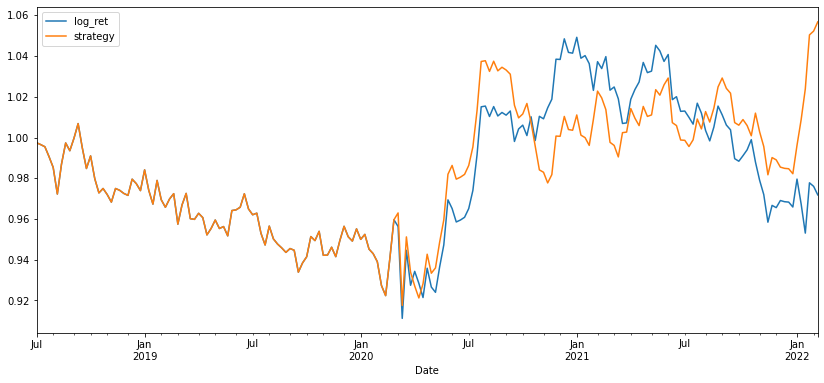

In [1094]:
test_data[['log_ret','strategy']].cumsum().apply(np.exp).plot(figsize=(14,6))

### C) Model Tunning and adding Momentum Features

In [1098]:
data_3 = data_2.copy()

In [1099]:
data_3.head()

,price,log_ret,direction,lag_1,lag_2,lag_3,3M_interest_diff,SP500-CAC 40,momentum
Date,,,,,,,,,
2004-01-16,1.258305,0.014813,1,-0.036501,0.021776,0.011994,-1.2439,2531.97,0.001930
2004-01-23,1.246805,-0.009181,0,0.014813,-0.036501,0.021776,-1.2398,2551.81,0.003173
2004-01-30,1.270002,0.018435,1,-0.009181,0.014813,-0.036501,-1.2222,2507.31,0.000580
2004-02-06,1.272799,0.002200,1,0.018435,-0.009181,0.014813,-1.1930,2481.96,0.001868
2004-02-13,1.254202,-0.014719,0,0.002200,0.018435,-0.009181,-1.1942,2503.53,-0.002047


##### Fiting DNN Model

In [1100]:
# splitting the training data and normalize them (80-20% split)

cutoff = '2018-07-01'

training_data = data_3[data_3.index < cutoff].copy()

# Normalizes the data by Gaussian normalization
mu, std = training_data.mean(), training_data.std()
training_data_ = (training_data - mu)/std

test_data = data_3[data_3.index >= cutoff].copy()
test_data_ = (test_data - mu)/ std

In [1101]:
set_seeds()

# model specifications

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (len(cols),)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1102]:
%%time
model.fit(training_data_[cols], training_data['direction'], epochs = 500, verbose = False, validation_split=0.2, shuffle=False)

Wall time: 13.3 s


#### check loss function

In [1103]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

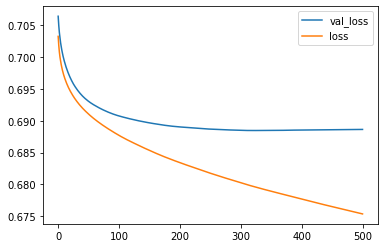

In [1104]:
losses[['val_loss', 'loss']].plot()

In [1106]:
# check the accuracy for in-sample prediction
model.evaluate(training_data_[cols], training_data['direction'])

24/24 [==============================] - 0s 564us/step - loss: 0.6780 - accuracy: 0.5801


[0.6779947876930237, 0.5801324248313904]

<AxesSubplot:>

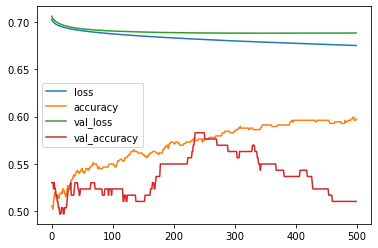

In [1105]:
losses.plot()

As we see validation losses is increasing which means we overfit, therefore, we are going to add early stop

##### Optimize validation loss using early stop

In [1038]:
set_seeds()

# model specifications

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (len(cols),)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1039]:
from tensorflow.keras.callbacks import EarlyStopping

In [1141]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 100)

In [1041]:
%%time
model.fit(training_data_[cols], training_data['direction'], epochs = 500, verbose = False, validation_split=0.2, shuffle=False, callbacks = [early_stop])

Epoch 34: early stopping
Wall time: 1.2 s


In [1042]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

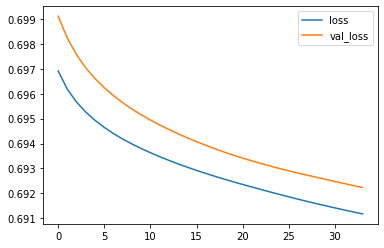

In [1044]:
model_loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

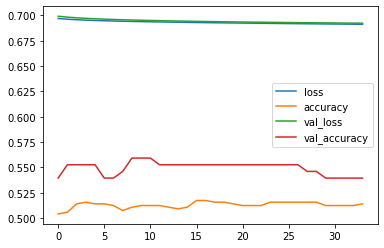

In [1043]:
model_loss.plot()

### Optimize validation loss using dropout

In [1184]:
from tensorflow.keras.layers import Dropout

In [1185]:
set_seeds()

# model specifications

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (len(cols),)))
model.add(Dropout(0.3))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))


model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1186]:
%%time
model.fit(training_data_[cols], training_data['direction'], epochs = 500, verbose = False, validation_split=0.2, shuffle=False, callbacks = [early_stop])

Epoch 101: early stopping
Wall time: 3.06 s


In [1187]:
model_loss_final = pd.DataFrame(model.history.history)

<AxesSubplot:>

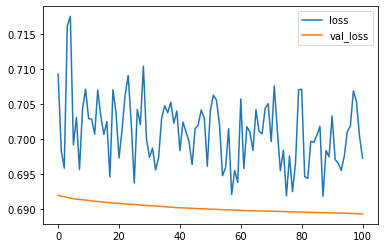

In [1188]:
model_loss_final[['loss', 'val_loss']].plot()

<AxesSubplot:>

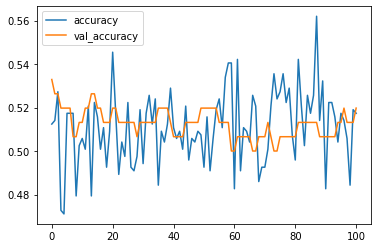

In [1226]:
model_loss_final[['accuracy', 'val_accuracy']].plot()

In [1189]:
# check the accuracy for in-sample prediction
model.evaluate(training_data_[cols], training_data['direction'])

24/24 [==============================] - 0s 695us/step - loss: 0.6921 - accuracy: 0.5297


[0.6920913457870483, 0.5297225713729858]

##### Evaluate the Strategy Return (in-sample)

In [1190]:
# convert predicted probablities to direction
pred = np.where(model.predict(training_data_[cols])>0.5, 1, 0)

In [1191]:
# convert direction to strategy positions
training_data['positions'] = np.where(pred>0, 1, -1) 

In [1192]:
# find the strategy return and compare it to just holding the asset
training_data['strategy'] = (training_data['positions']*training_data['log_ret'])

In [1193]:
training_data[['log_ret', 'strategy']].sum().apply(np.exp)

log_ret     0.929579
strategy    1.551726
dtype: float64

##### Evaluate the Strategy Return (out-of-sample)

In [1194]:
# check the accuracy for out-of-sample prediction
model.evaluate(test_data_[cols], test_data['direction'])

6/6 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5767


[0.6863658428192139, 0.5767195820808411]

In [1201]:
pred = np.where(model.predict(test_data_[cols])>0.5, 1, 0)
test_data['positions'] = np.where(pred>0,1,-1)

In [1202]:
# find the strategy return and compare it to just holding the asset
test_data['strategy'] = (test_data['positions']*test_data['log_ret'])

In [1203]:
test_data[['log_ret', 'strategy']].sum().apply(np.exp)

log_ret     0.971834
strategy    1.115098
dtype: float64

<AxesSubplot:xlabel='Date'>

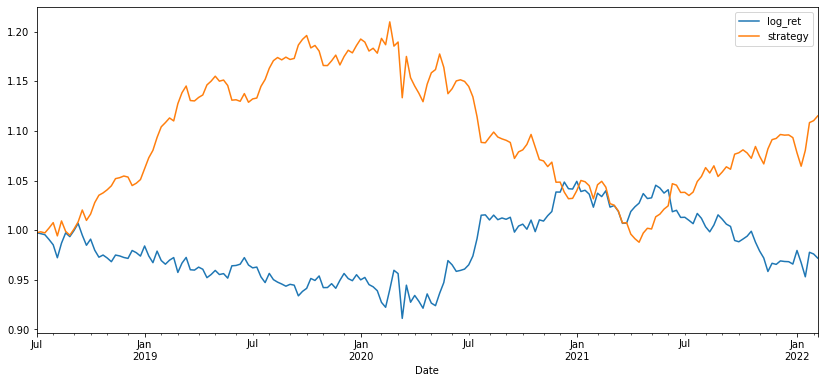

In [1204]:
test_data[['log_ret','strategy']].cumsum().apply(np.exp).plot(figsize=(14,6))

In [1205]:
Model_3 = data_3.join(test_data['strategy'])

In [1212]:
Model_3

,price,log_ret,direction,lag_1,lag_2,lag_3,3M_interest_diff,SP500-CAC 40,momentum,strategy
Date,,,,,,,,,,
2018-07-06,1.166589,-0.002570,0,0.011431,-0.003695,0.003383,2.5394,2615.95,0.000047,-0.002570
2018-07-13,1.165515,-0.000921,0,-0.002570,0.011431,-0.003695,2.5530,2627.89,-0.002205,0.000921
2018-07-20,1.164293,-0.001048,0,-0.000921,-0.002570,0.011431,2.5325,2596.49,0.001526,-0.001048
2018-07-27,1.158601,-0.004901,0,-0.001048,-0.000921,-0.002570,2.5393,2692.94,0.000639,0.004901
2018-08-03,1.152392,-0.005373,0,-0.004901,-0.001048,-0.000921,2.5428,2638.63,0.000398,0.005373
...,...,...,...,...,...,...,...,...,...,...
2022-01-14,1.131375,-0.012592,0,0.014084,-0.002488,-0.000204,0.7476,2480.15,0.002880,-0.012592
2022-01-21,1.114703,-0.014846,0,-0.012592,0.014084,-0.002488,0.8327,2670.65,-0.000360,0.014846
2022-01-28,1.143576,0.025572,1,-0.014846,-0.012592,0.014084,0.8460,2534.03,-0.003209,0.025572


## Q4

### cumulative return

<AxesSubplot:xlabel='Date'>

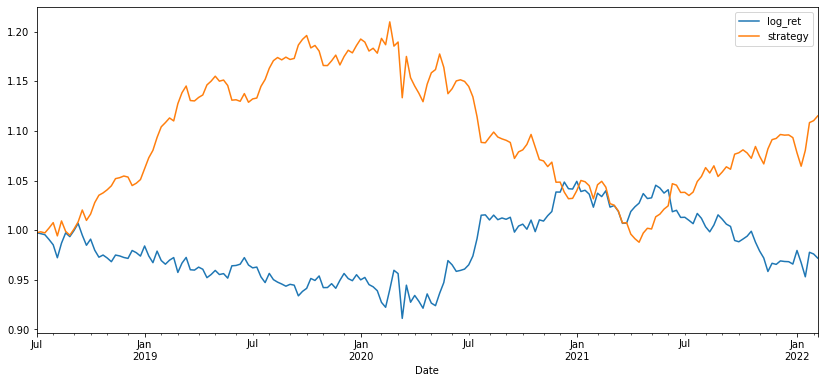

In [1213]:
##(a) plot cumulative return over time
Model_3[['log_ret','strategy']].cumsum().apply(np.exp).plot(figsize=(14,6))

### Monthly arthimatic average return 

In [1214]:
### arthimatice monthly average return
monthly = Model_3.resample('M').sum()

In [1216]:
# Monthly Returns

monthly['monthly ret%'] = (monthly['strategy'].apply(np.exp)-1)*100

In [1217]:
monthly['monthly ret%'].mean()

0.261854998012719

The arthimatic average of the Monthly Return is % 0.262


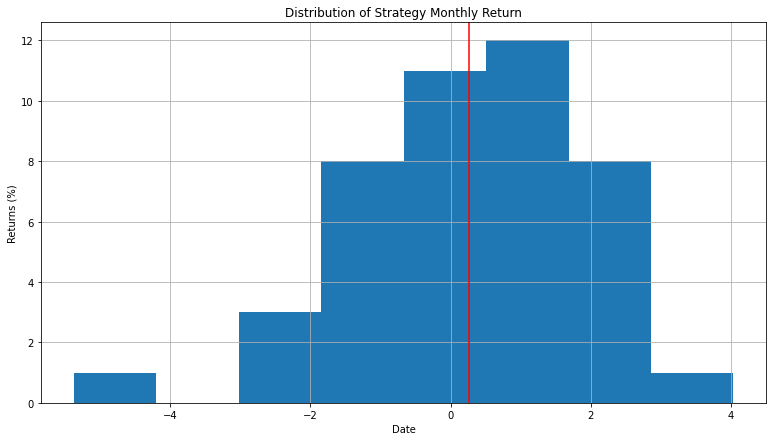

In [1227]:
# calculate the arthimatic monthly average

plt.figure(figsize = (13, 7))
plt.title("Distribution of Strategy Monthly Return")
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.hist(((monthly['strategy'].apply(np.exp)-1)*100), bins = 'auto')
plt.axvline(np.mean((monthly['strategy'].apply(np.exp)-1)*100), color = "red")
plt.grid()

print('The arthimatic average of the Monthly Return is %', round(np.mean((monthly['strategy'].apply(np.exp)-1)*100),3))

### standard deviation

In [1218]:
monthly['monthly ret%'].std()

1.6851453310812539

### Sharp ratio

In [1221]:
# Calculate and report sharpe ratio
def sharpe_ratio(returns, rfr):
    excess_returns = returns - rfr
    n = len(excess_returns)
    mean = excess_returns.mean()
    # use unbiased sd
    std = np.sqrt(np.sum(np.square(excess_returns - mean))/(n-1))
    
    return(mean/std)

In [1222]:
# sharp ratio for monthly returns
sharpe_ratio(monthly['monthly ret%'], 1.5/12)

0.08121257881354808

### 5% value at Risk

In [1228]:
# 5% value at risk for the monthly returns

np.quantile(monthly['monthly ret%'], 0.05)

-2.084639118920937

In [1229]:
# 1% value at risk for the monthly returns

np.quantile(monthly['monthly ret%'], 0.01)

-4.2175961441765635

In [1231]:
np.power(1.115,1/T)

1.0304023531412616

In [1256]:
monthly

,price,log_ret,direction,lag_1,lag_2,lag_3,3M_interest_diff,SP500-CAC 40,momentum,strategy,monthly ret%
Date,,,,,,,,,,,
2018-07-31,4.654998,-0.009441,0,0.006892,0.004245,0.008549,10.1642,10533.27,0.000006,0.002204,0.220681
2018-08-31,5.772339,0.002936,2,0.001865,-0.009639,-0.025569,12.9622,12777.97,-0.009233,-0.007228,-0.720232
2018-09-30,4.662319,-0.008815,2,-0.002342,0.019948,0.027788,10.8649,9972.14,0.012094,0.014855,1.496577
2018-10-31,4.583159,-0.010016,2,-0.022553,-0.027194,-0.008707,12.0043,9428.20,-0.013922,0.027006,2.737420
2018-11-30,5.686399,-0.002506,1,0.001309,-0.004973,-0.023177,15.2970,11551.88,-0.012048,0.016279,1.641211
2018-12-31,4.564262,0.001434,1,0.003355,0.004698,0.003415,12.7974,8904.56,0.002220,-0.003390,-0.338400
2019-01-31,4.566577,0.005116,2,-0.010337,-0.005621,0.012809,11.8694,8856.54,0.000328,0.039578,4.037194
2019-02-28,4.535059,-0.006664,2,0.002605,-0.008576,-0.015000,11.7282,9367.26,-0.005238,0.015086,1.519989
2019-03-31,5.633761,-0.013062,2,-0.010011,0.007028,-0.002684,14.7764,12517.83,-0.004513,0.017973,1.813551


In [1257]:
# defines a new column, cumret, with the gross performance over time
monthly['cumret'] = monthly['strategy'].cumsum().apply(np.exp)

In [1258]:
# defines yet another column with the running maximum value of the gross performance
monthly['cummax'] = monthly['cumret'].cummax()

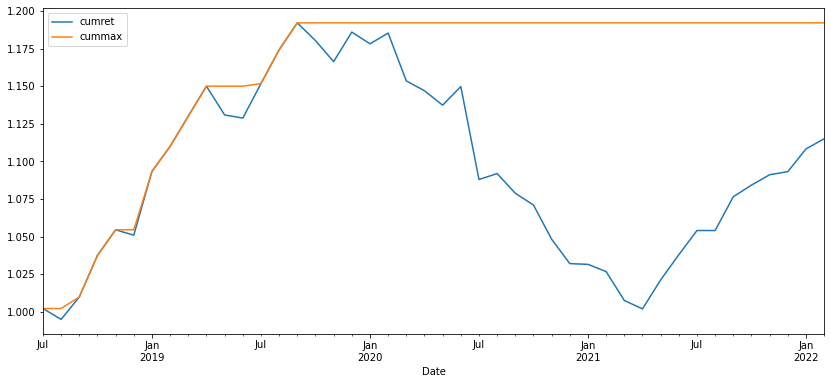

In [1259]:
# plots 
monthly[['cumret', 'cummax']].dropna().plot(figsize=(14,6));

In [1260]:
# calculate maximum drawdown

drawdown = monthly['cummax']-monthly['cumret']

drawdown.max()

0.1902335988136845